# Clasificador de imágenes

In [1]:
import pandas as pd
import os
import numpy as np
import zipfile
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping

# 1. Cargamos el conjunto de datos

In [2]:
# Ruta al archivo ZIP
zip_path = "../dogs-vs-cats.zip" 
extract_to = "../data/raw"       

# Extraer el archivo ZIP
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Archivo extraído correctamente en: {extract_to}")
else:
    print(f"El archivo ZIP no existe en la ruta: {zip_path}")

Archivo extraído correctamente en: ../data/raw


In [3]:
# Ruta al archivo ZIP
zip_path = "../data/raw/train.zip" 
extract_to = "../data/raw"       

# Extraer el archivo ZIP
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Archivo extraído correctamente en: {extract_to}")
else:
    print(f"El archivo ZIP no existe en la ruta: {zip_path}")

Archivo extraído correctamente en: ../data/raw


In [4]:
# Ruta al archivo ZIP
zip_path = "../data/raw/test1.zip" 
extract_to = "../data/raw"       

# Extraer el archivo ZIP
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Archivo extraído correctamente en: {extract_to}")
else:
    print(f"El archivo ZIP no existe en la ruta: {zip_path}")

Archivo extraído correctamente en: ../data/raw


# 2. Visualización y preprocesamiento de imágenes

In [5]:
# Carpetas de entrada y salida
input_dir = "../data/raw/train"
output_dir = "../data/processed"
os.makedirs(output_dir, exist_ok=True)

# Procesar imágenes
image_size = (255, 255)
categories = ['cat', 'dog']

# Crear carpetas de salida para cada categoría
for category in categories:
    os.makedirs(os.path.join(output_dir, category), exist_ok=True)

# Redimensionar y mover las imágenes
for filename in os.listdir(input_dir):
    category = 'cat' if 'cat' in filename else 'dog'
    img_path = os.path.join(input_dir, filename)
    img = cv2.imread(img_path)
    if img is not None:
        img_resized = cv2.resize(img, image_size)
        save_path = os.path.join(output_dir, category, filename)
        cv2.imwrite(save_path, img_resized)

print("Todas las imágenes han sido redimensionadas y clasificadas.")

Todas las imágenes han sido redimensionadas y clasificadas.


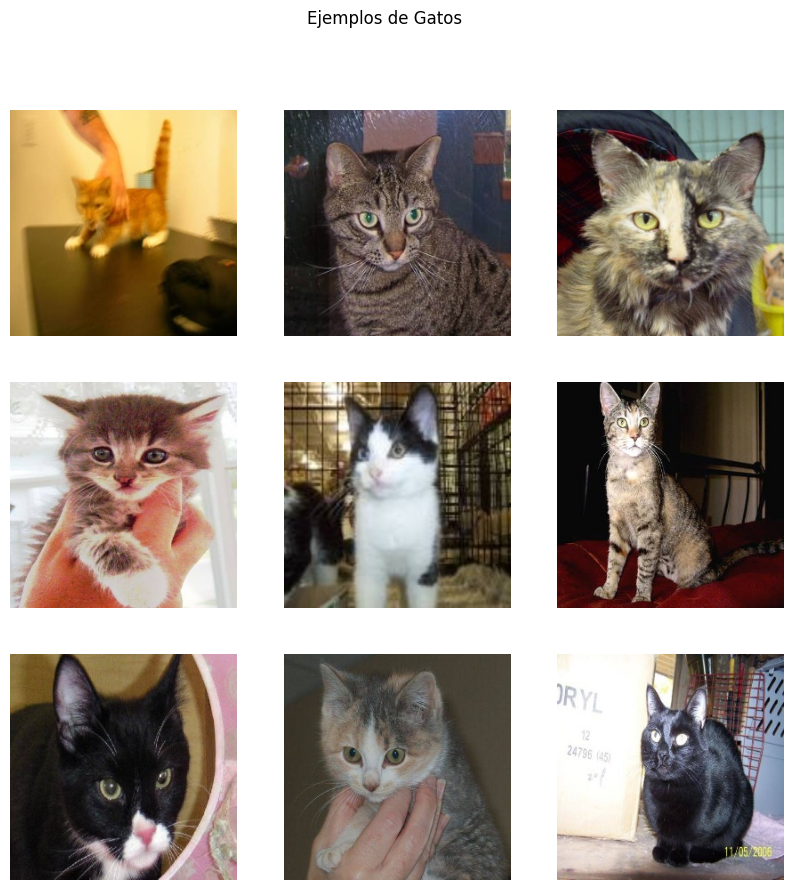

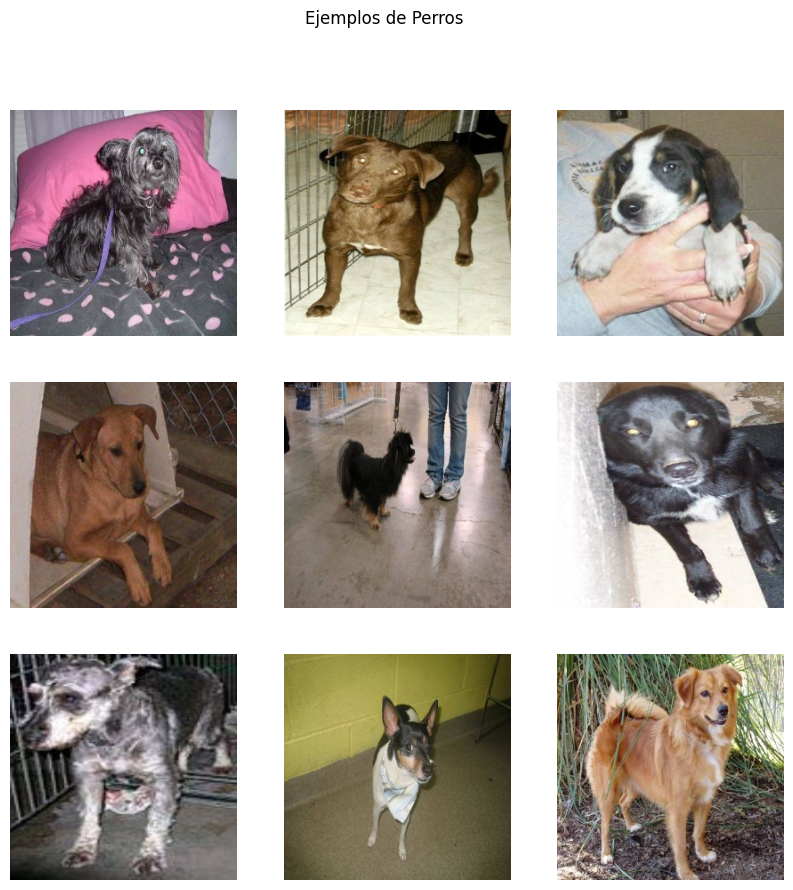

In [6]:
cat_images = [os.path.join(output_dir, "cat", img) for img in os.listdir(os.path.join(output_dir, "cat"))[:9]]
dog_images = [os.path.join(output_dir, "dog", img) for img in os.listdir(os.path.join(output_dir, "dog"))[:9]]

def plot_images(image_paths, title):
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(image_paths):
        plt.subplot(3, 3, i + 1)
        img = cv2.imread(img_path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

plot_images(cat_images, "Ejemplos de Gatos")
plot_images(dog_images, "Ejemplos de Perros")

# 3. Construir la Red Neuronal Convolucional (CNN)

In [7]:
# Crear el modelo
model = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(200, 200, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(2, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Natal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   655,364,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,889,090 (2.51 GB)

 Trainable params: 673,889,090 (2.51 GB)

 Non-trainable params: 0 (0.00 B)

In [8]:
train_dir = "../data/processed"
datagen = ImageDataGenerator(validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=(200, 200), batch_size=32, class_mode='categorical', subset='training')

validation_generator = datagen.flow_from_directory(
    train_dir, target_size=(200, 200), batch_size=32, class_mode='categorical', subset='validation')

# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


C:\Users\Natal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 19418s 31s/step - accuracy: 0.5049 - loss: 126.4612 - val_accuracy: 0.4998 - val_loss: 0.6932


In [9]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Precisión en el conjunto de validación: {accuracy}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.4973 - loss: 0.6932
Precisión en el conjunto de validación: 0.4997999966144562%


In [11]:
checkpoint = ModelCheckpoint("../models/img-classificator.keras", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_generator, steps_per_epoch = 100, validation_data = validation_generator, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 32s/step - accuracy: 0.4978 - loss: 0.7211 
Epoch 1: val_accuracy improved from -inf to 0.49062, saving model to ../models/img-classificator.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 3359s 34s/step - accuracy: 0.4977 - loss: 0.7223 - val_accuracy: 0.4906 - val_loss: 0.6929
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 31s/step - accuracy: 0.5002 - loss: 1.1256 
Epoch 2: val_accuracy did not improve from 0.49062
100/100 ━━━━━━━━━━━━━━━━━━━━ 3126s 31s/step - accuracy: 0.5003 - loss: 1.1245 - val_accuracy: 0.4844 - val_loss: 0.6939
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 34s/step - accuracy: 0.5110 - loss: 0.7309 
Epoch 3: val_accuracy improved from 0.49062 to 0.52812, saving model to ../models/img-classificator.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 3487s 35s/step - accuracy: 0.5110 - loss: 0.7310 - val_accuracy: 0.5281 - val_loss: 0.6922


# 4. Visualización de los datos

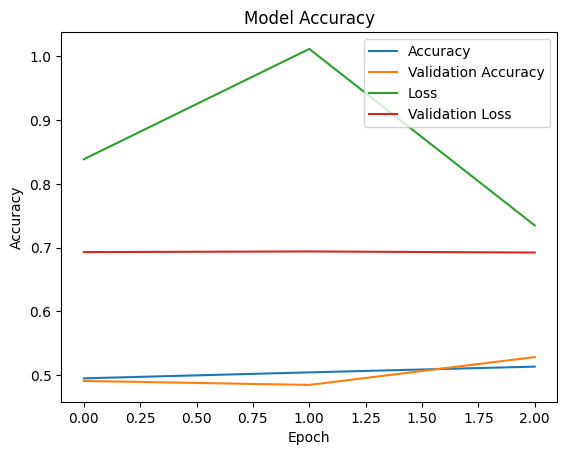

In [12]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

plt.show()

In [ ]:
img = image.load_img("../data/raw/test1/9.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/img-classificator.keras")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")